In [1]:
import json
import os
import time

In [2]:
path_events= "./results/events_processed.json"

# Check if the file exists
if not os.path.exists(path_events):
    print("File not found")
    exit()

In [3]:
with open(path_events, "r") as file:
    data = json.load(file)
    # print("Number of events: ", len(data))
    # format:
    #  {
    #     "timestamp": "2024-05-07 13:53:30",
    #     "parking_spot": "1",
    #     "action": "Take"
    # },
    # {
    #     "timestamp": "2024-05-07 14:44:50",
    #     "parking_spot": "1",
    #     "action": "Free"
    # },
    # {
    #     "timestamp": "2024-05-07 15:04:10",
    #     "parking_spot": "1",
    #     "action": "Take"
    # },

    '''
    there are 3 spots, so we need to keep track of the status of each spot
    1. save the taken time of each spot
    2. when a spot is free, calculate the duration and save it
    3. calculate the average duration
    4. calculate the max duration
    5. calculate the average chance to find a free spot per hour
    '''
    spots = {}
    for event in data:
        spot = event["parking_spot"]
        if spot not in spots:
            spots[spot] = {"taken": [], "free": []}
        if event["action"] == "Take":
            spots[spot]["taken"].append(event["timestamp"])
        elif event["action"] == "Free":
            spots[spot]["free"].append(event["timestamp"])

    # print(spots)
    # calculate the duration of each spot
    for spot in spots:
        for i in range(len(spots[spot]["free"])):
            taken = time.strptime(spots[spot]["taken"][i], "%Y-%m-%d %H:%M:%S")
            free = time.strptime(spots[spot]["free"][i], "%Y-%m-%d %H:%M:%S")
            duration = time.mktime(free) - time.mktime(taken)
            spots[spot]["free"][i] = duration

            # print("Spot: ", spot, "Duration: ", duration, "seconds")
            # print("from: ", taken,"\nto: ", free)

    # calculate the average duration
    avg_duration = {}
    for spot in spots:
        avg_duration[spot] = sum(spots[spot]["free"]) / len(spots[spot]["free"])

    # calculate the max duration
    max_duration = {}
    for spot in spots:
        max_duration[spot] = max(spots[spot]["free"])

    # calculate average chance to find a free spot.
    # we need to calculate the number of free spots per hour
    # and calculate the average
    histogram = {}
    for spot in spots:
        histogram[spot] = {}
        for i in range(24):
            histogram[spot][i] = 0
        for free in spots[spot]["free"]:
            free = time.localtime(free)
            histogram[spot][free.tm_hour] += 1



    print("Average duration: ", avg_duration, "minutes")
    print("Max duration: ", max_duration, "minutes")


    # # save the results
    # with open("./results/calculated_data.json", "w") as file:
    #     json.dump({"avg_duration": avg_duration, "max_duration": max_duration, "histogram": histogram}, file)
    #     print("Results saved to results.json")


Average chance to find a free spot per hour:  {0: 0.0, 1: 19.0, 2: 2.6666666666666665, 3: 0.6666666666666666, 4: 0.3333333333333333, 5: 1.0, 6: 0.0, 7: 0.0, 8: 1.0, 9: 0.0, 10: 0.6666666666666666, 11: 0.3333333333333333, 12: 0.0, 13: 0.3333333333333333, 14: 0.3333333333333333, 15: 0.3333333333333333, 16: 0.0, 17: 0.0, 18: 0.3333333333333333, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.3333333333333333, 23: 0.0}
Average duration:  {'2': 10116.829268292682, '3': 64668.57142857143, '1': 3435.294117647059} minutes
Max duration:  {'2': 102450.0, '3': 235130.0, '1': 28280.0} minutes


In [7]:
class Hour():
    def __init__(self, name):
        self.name = name
        
        self.free = 0
        self.total = 0

        self.right = 0
        self.center = 0
        self.left = 0


In [22]:
path_results = "./results/processed_results.json"

with open(path_results, "r") as file:
    data = json.load(file)
    hour_data = []

    for i in range(24):
        hour_data.append(Hour(i))

    for result in data:
        """    
        {
            "id": 523,
            "name": "2024_05_07_15_08_5.png",
            "year": "2024",
            "month": "05",
            "day": "07",
            "hour": "15",
            "minute": "08",
            "second": "50",
            "left": 1,
            "right": 1,
            "center": 1
        }
        """
        hour = int(result["hour"])
        hour_data[hour].total += 1
        hour_data[hour].right += result["right"]
        hour_data[hour].center += result["center"]
        hour_data[hour].left += result["left"]

    for hour in hour_data:
        hour.free = round((3 * hour.total - hour.right - hour.center - hour.left) / hour.total, 3) * 100
        hour.right = round(hour.right / hour.total, 3) * 100
        hour.center = round(hour.center / hour.total, 3) * 100
        hour.left = round(hour.left / hour.total, 3) * 100

    for hour in hour_data:
        print("Hour: ", hour.name)
        print("Free: ", hour.free)
        print("Total: ", hour.total)
        print("Right: ", hour.right)
        print("Center: ", hour.center)
        print("Left: ", hour.left)
        print("\n")




Hour:  0
Free:  100.1
Total:  1693
Right:  99.9
Center:  100.0
Left:  0.0


Hour:  1
Free:  100.0
Total:  1713
Right:  100.0
Center:  100.0
Left:  0.0


Hour:  2
Free:  99.5
Total:  1694
Right:  100.0
Center:  100.0
Left:  0.5


Hour:  3
Free:  100.0
Total:  1685
Right:  100.0
Center:  100.0
Left:  0.0


Hour:  4
Free:  100.0
Total:  1794
Right:  100.0
Center:  100.0
Left:  0.0


Hour:  5
Free:  99.6
Total:  1788
Right:  100.0
Center:  100.0
Left:  0.4


Hour:  6
Free:  119.5
Total:  1794
Right:  98.4
Center:  80.7
Left:  1.4000000000000001


Hour:  7
Free:  84.5
Total:  1794
Right:  99.7
Center:  74.9
Left:  40.9


Hour:  8
Free:  47.699999999999996
Total:  1794
Right:  100.0
Center:  100.0
Left:  52.300000000000004


Hour:  9
Free:  47.9
Total:  1800
Right:  99.8
Center:  92.4
Left:  59.9


Hour:  10
Free:  45.5
Total:  1783
Right:  99.9
Center:  90.4
Left:  64.2


Hour:  11
Free:  29.299999999999997
Total:  1801
Right:  100.0
Center:  92.30000000000001
Left:  78.4


Hour:  12
Free: 

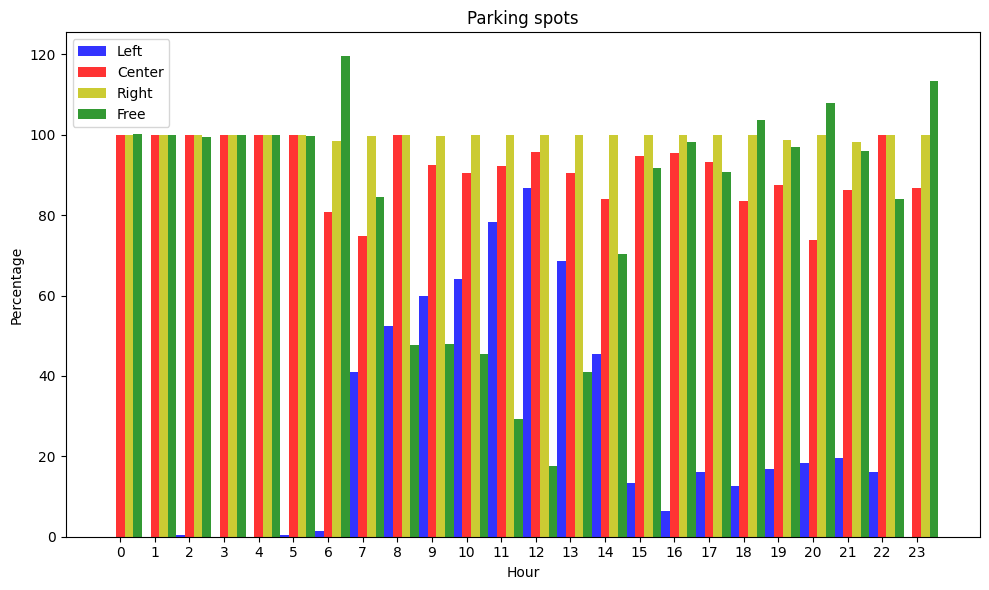

In [35]:
# make histogram of right, center, left and free spots

h_l = []
h_c = []
h_r = []
h_f = []

for hour in hour_data:
    h_l.append(hour.left)
    h_c.append(hour.center)
    h_r.append(hour.right)
    h_f.append(hour.free)

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
index = np.arange(24)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, h_l, bar_width, alpha=opacity, color='b', label='Left')
rects2 = plt.bar(index + bar_width, h_c, bar_width, alpha=opacity, color='r', label='Center')
rects3 = plt.bar(index + 2 * bar_width, h_r, bar_width, alpha=opacity, color='y', label='Right')
rects4 = plt.bar(index + 3 * bar_width, h_f, bar_width, alpha=opacity, color='g', label='Free')

plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.title('Parking spots')
plt.xticks(index + bar_width, range(24))
plt.legend()

plt.tight_layout()
plt.show()
